In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [2]:
url = 'data.csv'
target = 'language'
random_state = 42
cv = 5

In [3]:
df = pd.read_csv(url) #read the csv file
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [4]:
print("The size of the dataset is", df.shape)

The size of the dataset is (329, 13)


array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>],
       [<Axes: title={'center': 'X4'}>, <Axes: title={'center': 'X5'}>,
        <Axes: title={'center': 'X6'}>],
       [<Axes: title={'center': 'X7'}>, <Axes: title={'center': 'X8'}>,
        <Axes: title={'center': 'X9'}>],
       [<Axes: title={'center': 'X10'}>, <Axes: title={'center': 'X11'}>,
        <Axes: title={'center': 'X12'}>]], dtype=object)

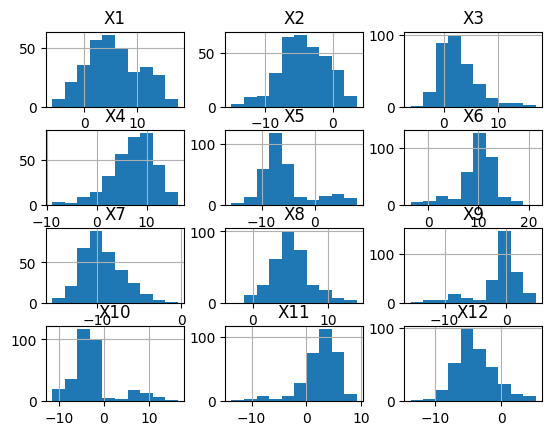

In [5]:
df.hist() #print the histogram of numerical columns

In [6]:
#We can see some imbalanced distributions for the feauters X6,X8,X9,X10,X11,X12
# Even in the target we can see a dominantion of US

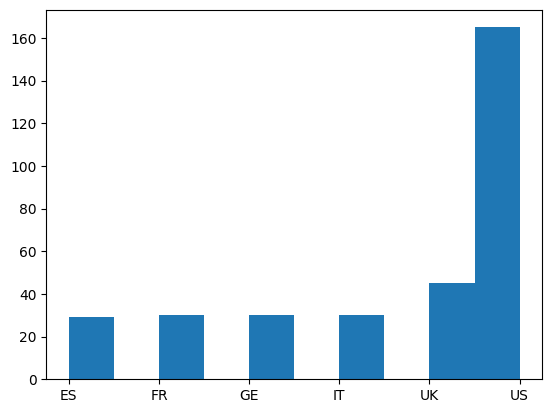

In [7]:
plt.hist(df[target]) #plot the histogram of 'language' column
plt.show()

In [8]:
df = df.dropna() #Delete rows with one or more NaN values
print("The shape without NaN values is",df.shape)

The shape without NaN values is (321, 13)


In [9]:
#split dataset in features and target
X = df.drop(target, axis=1)
y = df[target]

In [10]:
# initialize a decision tree classifier with random_state=42 for replicability
dt = DecisionTreeClassifier( random_state=random_state )

#set the score for search
score = 'recall_macro'

max_depth = range(5,20) # generate possible max depth
min_samples_split = range(2,10)

# set the parameters for the search process
parameters_dt = {'max_depth': max_depth,
              'min_samples_split' : min_samples_split,
              'splitter' : ['best' , 'random' ],
              'criterion' : ['gini', 'entropy', 'log_loss']
             }

#initialize grid search
clf = GridSearchCV(dt, parameters_dt, scoring=score, cv=5) 
clf.fit(X, y) # search best hyperparameters

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': range(5, 20), 'min_samples_split': range(2, 10), 'splitter': ['best', 'random']}"
,scoring,'recall_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [11]:
y_pred = clf.best_estimator_.predict(X) #use best estimator to predic class
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

          ES       0.96      0.93      0.95        29
          FR       0.97      0.93      0.95        30
          GE       0.91      1.00      0.95        30
          IT       0.93      0.93      0.93        30
          UK       0.91      0.91      0.91        45
          US       0.97      0.96      0.96       157

    accuracy                           0.95       321
   macro avg       0.94      0.95      0.94       321
weighted avg       0.95      0.95      0.95       321



In [12]:
print(confusion_matrix(y, y_pred, normalize='true'))

[[0.93103448 0.         0.         0.         0.06896552 0.        ]
 [0.         0.93333333 0.         0.         0.         0.06666667]
 [0.         0.         1.         0.         0.         0.        ]
 [0.03333333 0.         0.03333333 0.93333333 0.         0.        ]
 [0.         0.         0.02222222 0.         0.91111111 0.06666667]
 [0.         0.00636943 0.00636943 0.01273885 0.01273885 0.96178344]]


In [13]:
# initialize a kn classifier random_state=42 for replicability
gnb = GaussianNB()

n_neighbors = range(5,10)

# set the parameters for the search process
parameters_gnb = {'weights': ['uniform', 'distance'],
                  'n_neighbors' : n_neighbors,
                  'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
                 }

#initialize grid search
clf = GridSearchCV(gnb, parameters_gnb, scoring=score, cv=5) 
clf.fit(X, y) # search best hyperparameters

ValueError: Invalid parameter 'algorithm' for estimator GaussianNB(). Valid parameters are: ['priors', 'var_smoothing'].

In [ ]:
y_pred = clf.best_estimator_.predict(X) #use best estimator to predic class
print(classification_report(y, y_pred))

In [ ]:
print(confusion_matrix(y, y_pred, normalize='true'))